# Project: Bank Churn Prediction (Intro to Neural Networks)

## Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## <a id = "TOC"></a> Table of Contents
- <a href = #import>Import Libraries and Load Dataset </a>

- <a href = #eda>EDA</a> 
    - <a href = #univariate>Univariate Analysis</a>
    - <a href = #bivariate>Bivariate Analysis</a>
    - <a href = #eda-insights>Summary EDA Insights</a>
- <a href = #data-pre>Data Pre-Processing</a>
    - <a href = #feature>Feature Engineering</a>
    - <a href = #outlier>Outlier Treatment</a>
    - <a href = #split>Split Data</a>

- <a href = #model>Model Building</a> 

- <a href = #performance>Model Performance Evaluation</a>

- <a href = #conclusion>Conclusion and Business Recommendations</a>

## Data Dictionary
* **RowNumber:** Row number.
* **CustomerId:** Unique identification key for different customers.
* **Surname:** Surname of the customer
* **Credit Score:** A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* **Geography:** The country to which the customer belongs.
* **Gender:** The gender of the customer.
* **Age:** Age of the customer.
* **Tenure:** The period of time a customer has been associated with the bank.
* **Balance:** The account balance (the amount of money deposited in the bank account) of the customer.
* **NumOfProducts:** How many accounts, bank account affiliated products the person has.
* **HasCrCard:** Does the customer have a credit card through the bank?
* **IsActiveMember:** Subjective, but for the concept
* **EstimatedSalary:** Estimated salary of the customer.
* **Exited:** Did they leave the bank after all?

# <a id = "import"></a>1. Import Libraries and Load Dataset

## Import Relevant Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import core libraries
import numpy as np
import pandas as pd
import tensorflow as tf

# Import libraries for metrics and scores
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

# Import libraries for data visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model building 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# Import libraries for calculating threshold with precision-recall curve
from numpy import argmax
from sklearn.metrics import precision_recall_curve

# Import library to scale the data for modeling
from sklearn.preprocessing import StandardScaler

## Read the Data File

In [2]:
# Name of the file to read
file = 'bank.csv'

# Read the file and assign to df variable
df = pd.read_csv(file)

## If using Google CoLab

In [3]:
#mouting the drive
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
#Defining the path of the dataset
#project_path = '/content/drive/My Drive/'
#dataset_file = project_path + 'creditcard.csv'

In [5]:
#reading dataset
#df = pd.read_csv(dataset_file)

### Check Head, Tail, and Shape

In [6]:
# View the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# View the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
# Check the number of rows and columns
df.shape

(10000, 14)

#### Observations
* We have 10,000 records in the data with 14 columns 
* This should be plenty of data for a good model if the features are independent and add value
* Exited is the target (dependent) variable
* RowNumber, CustomerID, and Surname likely add little value to the model, so I will probably drop them later after checking for duplicates

### Check Column Data Types

In [9]:
# Check the data types and non-null count for each column in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations
* Appears that the data does not have any null values (all have 10,000 non-null count)
* Will need to convert some columns to "category" Dtype

### Check Number of Unique Values

In [10]:
# Check the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Observations
* All RowNumber and CustomerID values are unique, so I can drop the columns... also suggests we don't have any duplicate customers in the data
* Exited only has 2 values, which is what is expected and good
* The binary columns (Gender, Exited, HasCrCard, IsActiveMember) have 2 unique values each, which means no bad data in the columns
* Only 3 categories for Geography
* Surname, CreditScore, Age, Tenure, Balance, and Estimated Salary have a lot of unique values and should remain numeric columns
* All others are categorical and need to be converted to category Dtype
* Estimated salary, almost every row is unique

In [11]:
# Drop RowNumber and CustomerId columns because they won't add value to the models
# Each value is unique and both are essentially the same as the index 
df.drop('RowNumber', axis=1, inplace=True)
df.drop('CustomerId', axis=1, inplace=True)

In [12]:
# Drop Surname because there are almost 3,000 unique values and 
# it will be too many dimensions for the model as categories
# Also, considering Surname in a bank's ML model would likely be considered unethical
df.drop('Surname', axis=1, inplace=True)

### Fix Dtypes Where Necessary

In [13]:
# Convert relevant columns with categorical data to Dtype "category" 
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
#df['HasCrCard'] = df['HasCrCard'].astype('category')
#df['IsActiveMember'] = df['IsActiveMember'].astype('category')
#df['Exited'] = df['Exited'].astype('category')

In [14]:
# Check Dtypes after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(6)
memory usage: 654.8 KB


#### Observations
* Memory usage has been reduced almost 50%
* Columns appear to be in the correct Dtypes now
* Reduced down to 10 independent variables and 1 dependent variable

### Check for Null Values

In [15]:
# Display how many null values we have in each column
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observations
* No null values in the data

### Check the Statistical Summary of the Data

In [16]:
# Check the central tendency, frequency, range, etc. for numeric columns
# Transpose for ease of viewing
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### Observations
* **Credit Scores** have a range of 350 to 850. The FICO range is 300 to 850, so this range is logical. Might be an opportunity to create bins based on standard ranges banks use. Mean and Median are close, so likely a normal distribution.
* **Age** has a range of 18 to 92, which is also logical for bank customers (typically must be at least 18 to have own account). The mean is slighly higher than the median, so might have a slight right skew.
* **Tenure** has a range of 0 to 10. It's unclear whether this is years, months, or some other date measure. 0 is likely logical because it would represent someone who is a new customer and hasn't been a customer for a full 1 "period" of time yet. Mean and median are both 5, so this is likely a normal distribution.
* **Balance** has a range from 0 to 250,898.09. This data has a left skew because there are a lot of 0 balance accounts. 
* Estimated Salary has a range of 51,002 to 199,992, which is reasonable. The mean and median are very close, so this is likely a normal distribution. 
* Overall, the numeric columns seem to be in good shape. Nothing jumps out as bad data and most of the columns seem to be normally distributed. 

### Check Count Unique Values within Categoricial Columns

In [17]:
# Make a list of all categorical variables
cat_col = [
    "Geography",
    "Gender",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "Exited"
]

# Print the count of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
----------------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
----------------------------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
----------------------------------------
0    7963
1    2037
Name: Exited, dtype: int64
----------------------------------------


#### Observations
* The target variable is imbalanced. Only around 20% of customers in this data set exited. I might have to do some upsampling or downsampling later because of this. 
* Some of the other columns are imbalanced, but nothing looks unreasonable.
* Gender is fairly balanced. 
* The data appears to be good -- I don't see any "unknown" entries or unexpected values.

## Initial Feature Engineering

### Group Credit Scores into Credit Rating Bins

In [18]:
# Create a CreditRating column that bins the numeric scores
# Using the standard bins defined by FICO and used by most banks

rating_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
rating_bins = [0, 580, 670, 740, 800, 850]
df['CreditRating'] = pd.cut(df['CreditScore'], bins=rating_bins, labels=rating_labels, ordered=True)

In [19]:
df['CreditRating'].value_counts()

Fair           3350
Good           2397
Poor           2393
Very Good      1215
Exceptional     645
Name: CreditRating, dtype: int64

#### Observations
* Over half of the customers in this data have a Poor or Fair credit rating (below 670).  
* Few customers in this data have an Exceptional rating (800 or more) 

<a href = #TOC>Back to Top</a>

# <a id = "eda"></a>2. EDA

### Establish Target Variable

In [20]:
# Create a variable for the target column for use throughout
target = 'Exited'

## <a id = "univariate"></a>Univariate Analysis

### Univariate Analysis: Numeric Features

In [21]:
# Define a method to show the boxplot and histogram for each numeric column... 
# in a stacked presentation for easier review of distribution and central tendency

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid is = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # Create a boxplot with a star to indicate the mean value of the column
    sns.histplot(x=feature, kde=False, ax=ax_hist2) # Create a histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

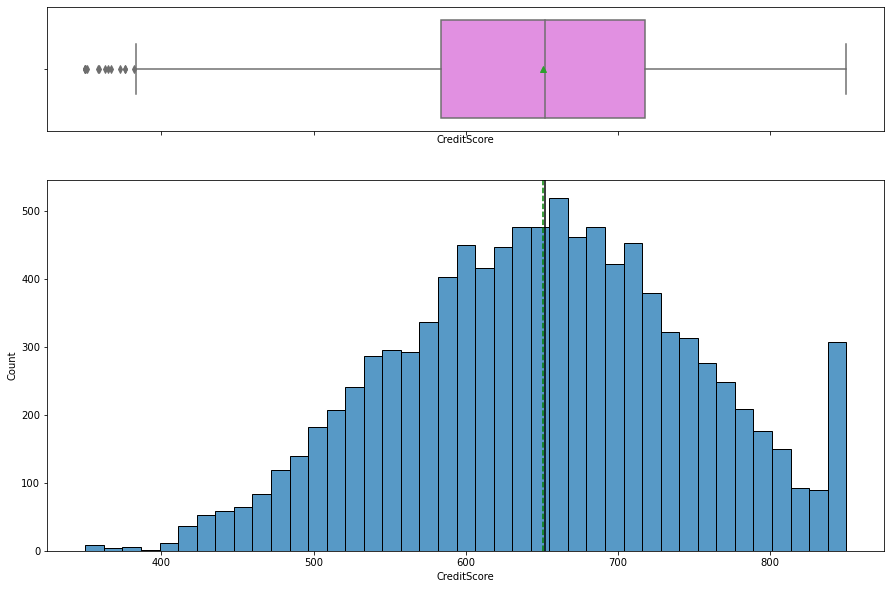

In [22]:
# Run the function to create a boxplot and distplot for each numeric column
histogram_boxplot(df['CreditScore'])

#### Observations
* Credit score has a fairly normal distribution, except a cluster of customers with "perfect" scores of 850.
* There are a few outliers below 400 

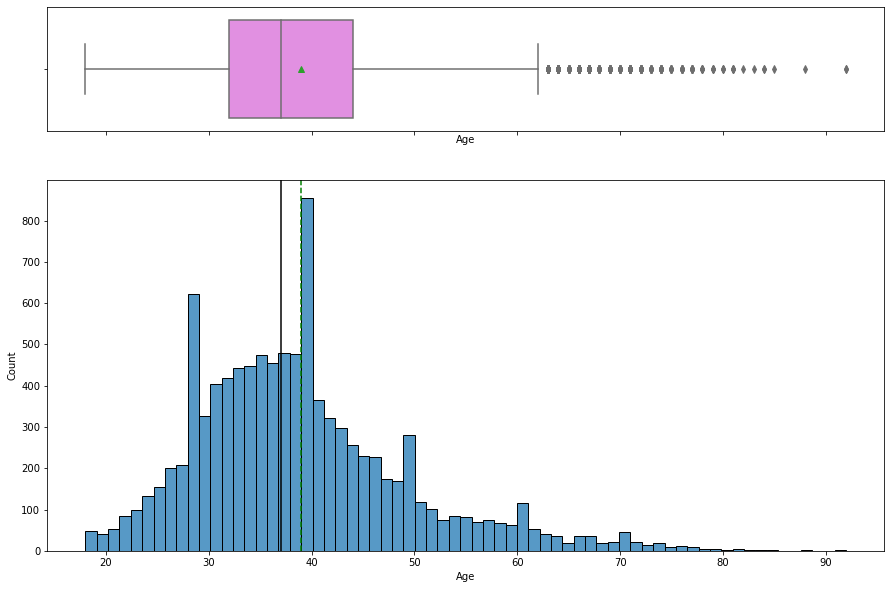

In [23]:
histogram_boxplot(df['Age'])

#### Observations
* Most customers in this dataset are "working age" -- 18 to 65. There are a number of outliers over 65 years old. 
* The largest group of customers is around 40 years old.

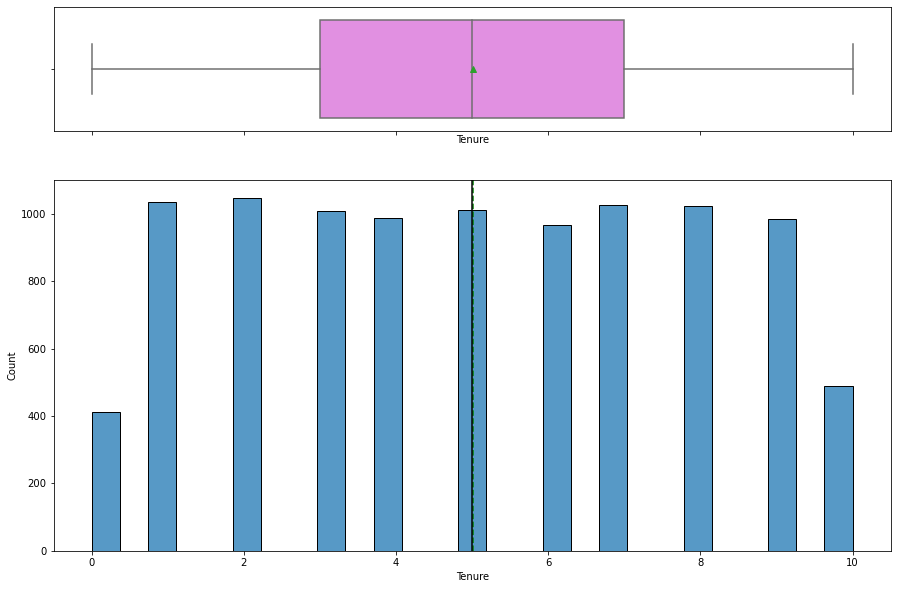

In [24]:
histogram_boxplot(df['Tenure'])

#### Observations
* Between 1 and 9 "periods", tenure is basically evenly distributed. 
* There are fewer customers with 0 or 10 tenure

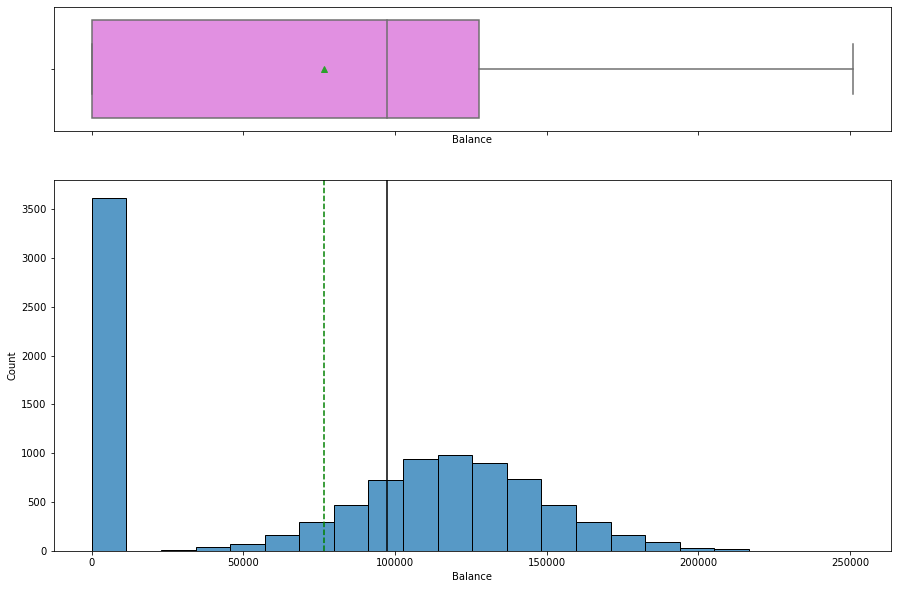

In [25]:
histogram_boxplot(df['Balance'])

#### Observations
* There are really two groups of customers with regards to balance: One large group with 0 balance and a group with a normal distribution of balances
* All of the 0 balance customers throw off the mean and median for the rest of the data

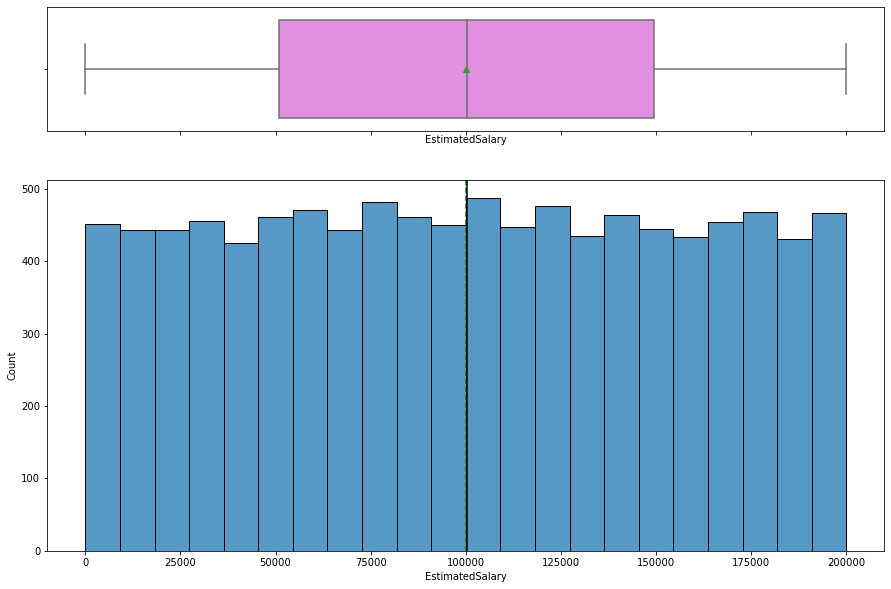

In [26]:
histogram_boxplot(df['EstimatedSalary'])

#### Observations
* Between 0 and 200,000, Estimated Salary is very evenly distributed (not a normal distribution). 
* Because of this, the mean/median are right around 100,000

### Univariate Analysis: Categorical Features

In [27]:
# Create a function that will create barplots annotated with percentages for each category column

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(8,6)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percentage on top of each bar
        
    plt.show() # show the plot

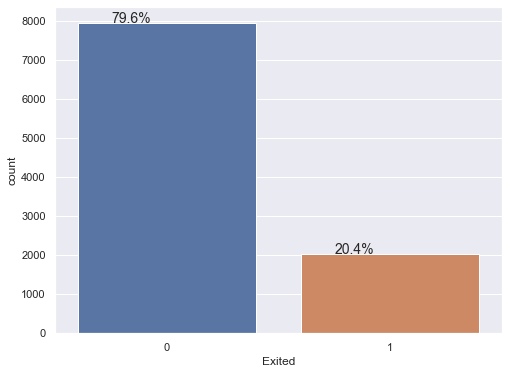

In [28]:
# Run the function to create a barplot with annotated percentages
# For the Exited column (dependent variable)
perc_on_bar(df[target])

#### Observations
* Most customers in this data set did not exit, almost 80% stayed 
* Will probably need to deal with this imbalance in the target variable during model building

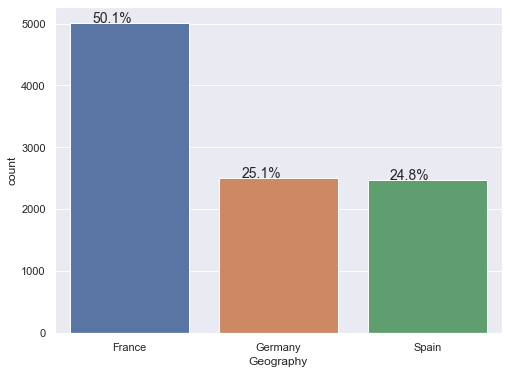

In [29]:
perc_on_bar(df['Geography'])

#### Observations
* The customers are from 3 countries
* Half of the customers are from France
* The other half is split evenly between Germany and Spain

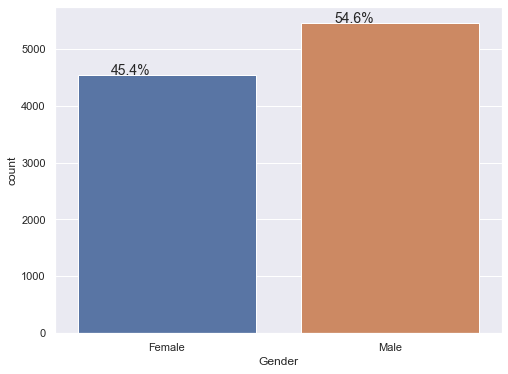

In [30]:
perc_on_bar(df['Gender'])

#### Observations
* More of the customers are Male, but it is not a large difference

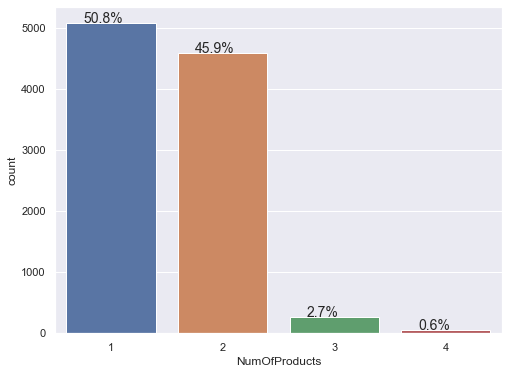

In [31]:
perc_on_bar(df['NumOfProducts'])

#### Observations
* Over half the customers have just 1 product with the bank
* 46% have 2 products, and very few (less than 5%) have 3 or 4
* Over 95% of customers have 1 or 2 products with the bank. 

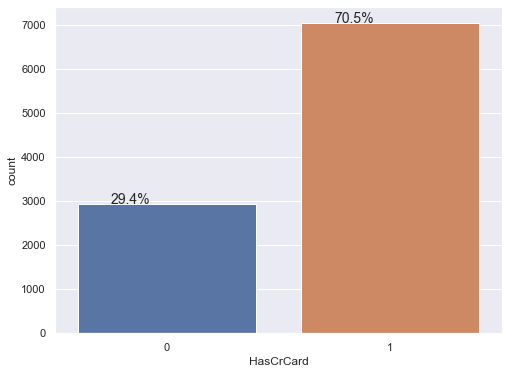

In [32]:
perc_on_bar(df['HasCrCard'])

#### Observations
* Most customers (70%) do have a credit card
* I will check to see if there is anything unusual about having a credit card and the number of products later on

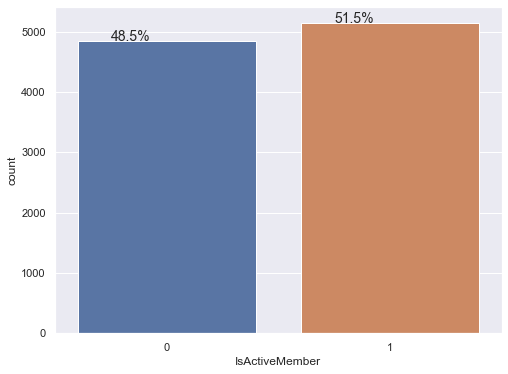

In [33]:
perc_on_bar(df['IsActiveMember'])

#### Observations
* It is unclear how the bank is defining an "Active Member", but it appears a little over half of the customers are active
* Bivariate analysis with this data point might be interesting, i will do that later on

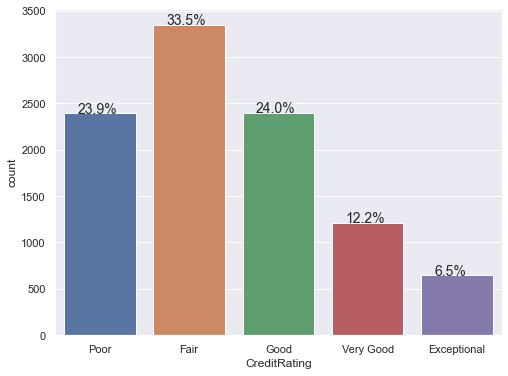

In [34]:
perc_on_bar(df['CreditRating'])

#### Observations
* Over half the customers have a Poor or Fair Credit Rating
* Few customers have an Exceptional rating

<a href = #TOC>Back to Top</a>

## <a id = "bivariate"></a>Bivariate Analysis

### Bivariate Analysis: Correlation Heatmap

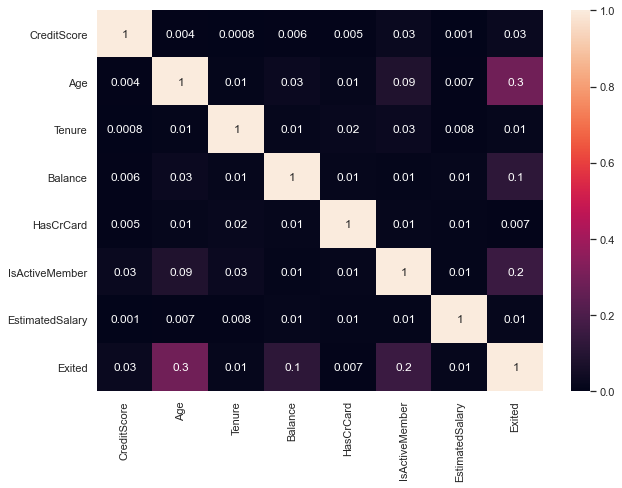

In [35]:
# Create a correlation heatmap to check for highly correlated features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr().abs(),annot=True,vmin=0,vmax=1,fmt='.1g')
plt.show()

#### Observations
* None of the numeric features is correlated, so these features are independent

### Bivariate Analysis: Numeric Pairplot

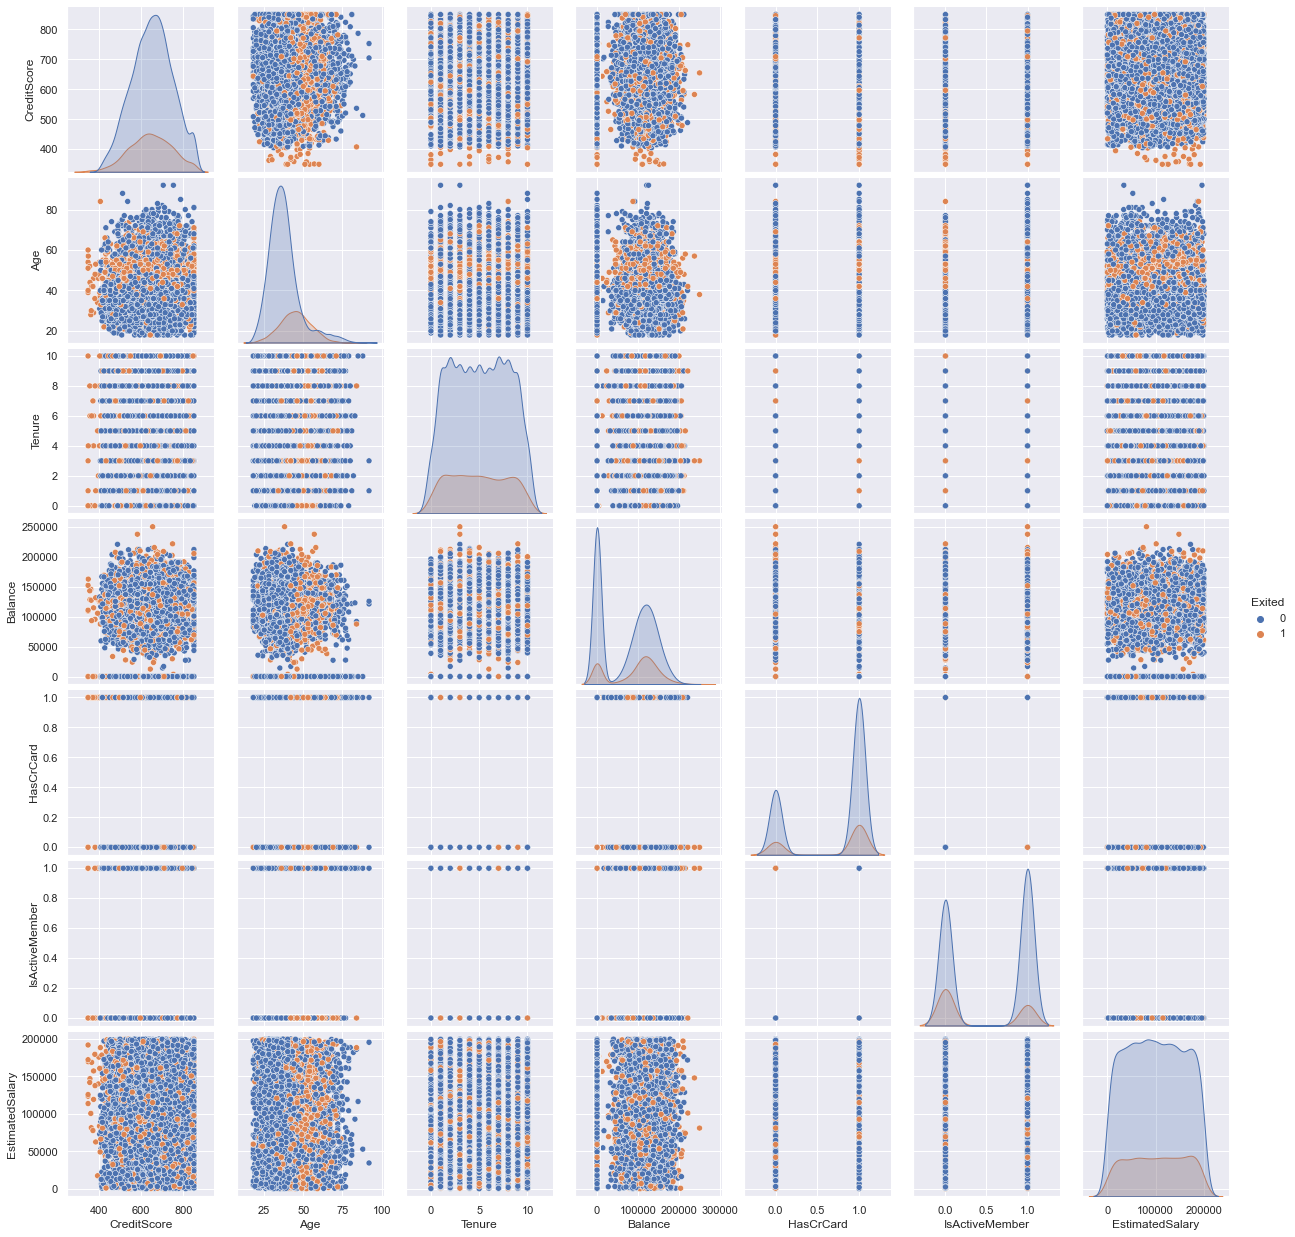

In [36]:
# Create a pairplot to view relationships between numeric features
# Hue by the dependent variable
sns.pairplot(df,hue=target)
plt.show()

#### Observations
* Low Credit Score (below 400) seems to have customers who exited (and none or few who stayed)
* Appears that customers who exited are on average slightly older (average age around 50), whereas customer who stayed have an average age around 30. 
* Balance appears to be bi-modal. 

### Bivariate Analysis: Stacked Bar Charts for Categorical Columns

In [37]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x, flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, df[target], margins=True)
    if flag==True:
        print(tab1)
        print('-'*70)
    tab = pd.crosstab(x, df[target], normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
----------------------------------------------------------------------


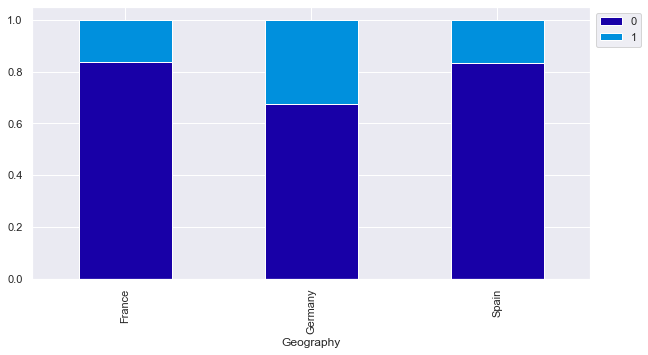

In [38]:
# Run function to create a stacked bar chart 
stacked_plot(df['Geography'])

#### Observations
* Customers in France and Spain leave at roughly the same rate (a little less than 20%)
* Customers in Germany are more likely to leave on average (over 30% leave the bank)

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
----------------------------------------------------------------------


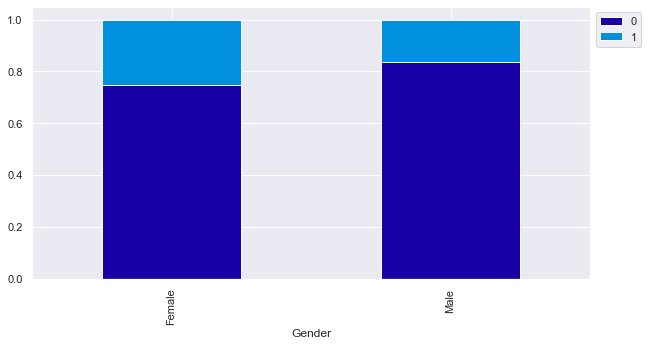

In [39]:
stacked_plot(df['Gender'])

#### Observations
* On average, males leave the bank more often that females

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
----------------------------------------------------------------------


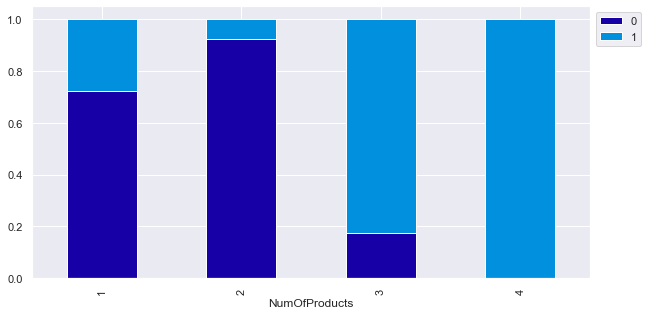

In [40]:
stacked_plot(df['NumOfProducts'])

#### Observations
* Customers with 2 products are least likely to leave the bank. Less than 10% on average leave. 
* 100% of customers with 4 products left the bank (though the size is small, only 60 customers total)
* Over 80% of customers with 3 products left the bank
* Around 30% of customers with 1 product left the bank
* Customers with 1, 3, or 4 products left at a higher than average rate, while customers with 2 products left at a lower than average rate. 

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
----------------------------------------------------------------------


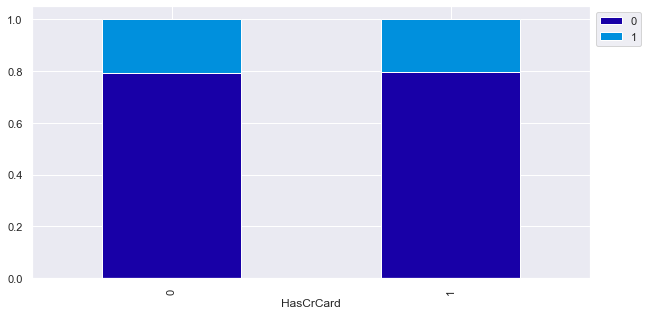

In [41]:
stacked_plot(df['HasCrCard'])

#### Observations
* No significant difference between customers who have and do not have a credit card

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
----------------------------------------------------------------------


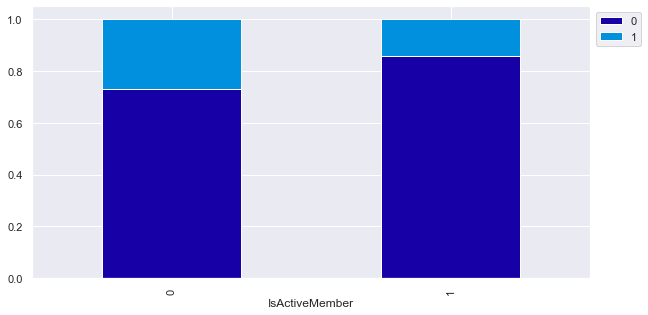

In [42]:
stacked_plot(df['IsActiveMember'])

#### Observations
* Customers who are not active members leave more often than active members. 

Exited           0     1    All
CreditRating                   
Poor          1863   530   2393
Fair          2667   683   3350
Good          1946   451   2397
Very Good      969   246   1215
Exceptional    518   127    645
All           7963  2037  10000
----------------------------------------------------------------------


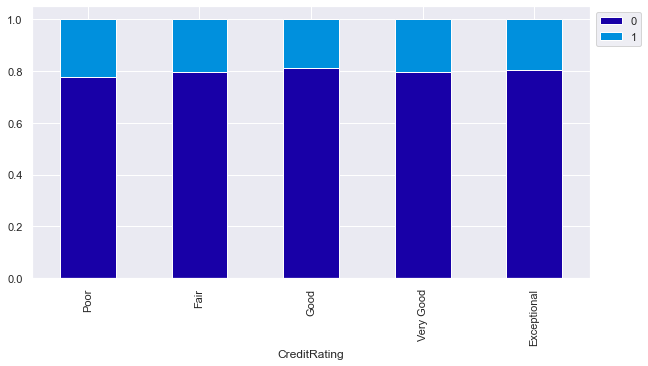

In [43]:
stacked_plot(df['CreditRating'])

#### Observations
* Credit rating does not appear to be a differentiator -- customers with each credit rating category leave at the same rate (around 20%) 

### Bivariate Analysis: Box Plots for Target Variable vs. Numeric Columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  CreditRating     10000 non-null  category
dtypes: category(4), float64(2), int64(6)
memory usage: 664.8 KB


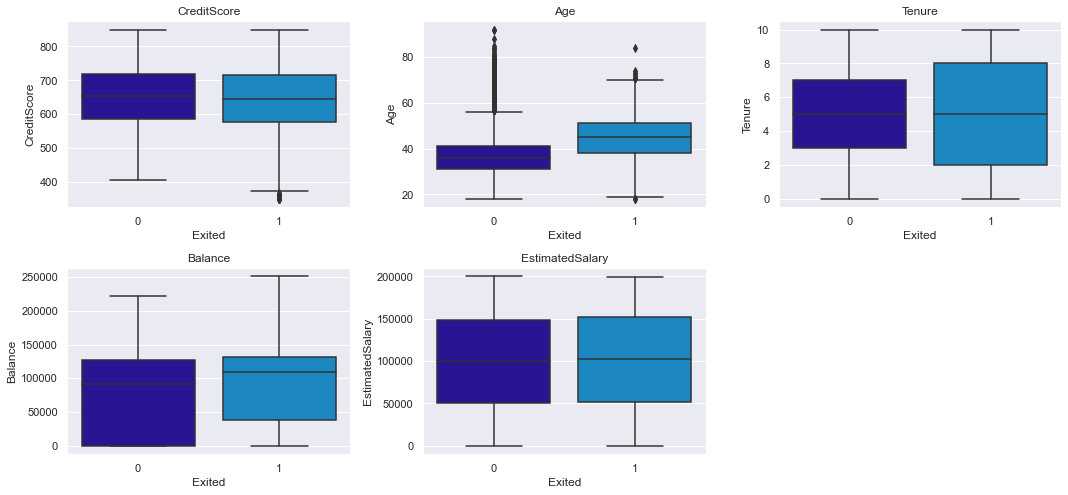

In [45]:
# Create a list of the numeric columns
num_cols = df[
    [
        "CreditScore",
        "Age",
        "Tenure",
        "Balance",
        "EstimatedSalary"
    ]
].columns.tolist()

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Function to iteratively create boxplots 
for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df[target], y = df[variable], data = df)
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations
* Credit score averages and quartiles are very similar for customers who exited and who stayed.  
* Customers who left the bank were older on average -- most were between 38 and 50 years old. Customers who stayed were younger -- most were 30 to 40 years old
* Tenure is similar for customers who exited and stayed. The IQR is slightly wider for those who exited (2 to 8) than those who stayed (3 to 7)
* Average balance was slightly higher for those who exited
* Estimated salary was the same for both. 

<a href = #TOC>Back to Top</a>

## <a id = "eda-insights"></a>Summary Insights from EDA

* Customers who left the bank, on average:
    + Were older
    + Had higher balances
    + Were not active members
    + Had more products (3 or 4)
    + Were more often female
    + Lived in Germany
* In the rest of the features, there was litte difference between those who exited and those who stayed.

<a href = #TOC>Back to Top</a>

# <a id = "data-pre"></a>3. Data Pre-Processing

## <a id = "feature"></a>Feature Engineering and Data Preparation

* I don't see the need to create any additional features based on the EDA
* I don't see any missing data, so no need to impute missing values

In [46]:
# Drop the column I created for EDA purposes
df.drop('CreditRating', axis=1, inplace=True)

## <a id = "split"></a>Split Data into Training and Test Sets

In [47]:
# Split the features into X and y, with y as the target column 
X = df.drop(target, axis=1)
y = df[target]

In [48]:
# Print the shape of the split data 
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [49]:
# Split the data into training and test sets
# Using 70/30 split for train/test size
# Set stratify parameter to y because of the imbalance in the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7000, 10) (3000, 10)


* Spiltting 70/30 worked

<a href = #TOC>Back to Top</a>

## <a id = "outlier"></a>Outlier Treatment

This data set does not have any extreme or problematic outliers. Any outliers present are within reason and represent the real world. I am choosing to leave outliers as is.  

## Encode Categorical Variables

In [50]:
# Use get_dummies to create dummie columns for each categorical variable
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Print shape of Train and Test sets to confirm column size is the same
print(X_train.shape, X_test.shape)

(7000, 13) (3000, 13)


* Encoding worked, the Train and Test both have 13 columns each now

In [51]:
# View the new columns
X_train.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
7635,516,29,2,104982.57,1,0,157378.50,0,0,0,0,0,0
5284,745,51,3,99183.90,1,1,28922.25,1,0,1,0,0,0
1457,850,66,4,0.00,0,1,64350.80,0,0,1,1,0,0
4785,510,22,3,156834.34,0,0,44374.44,0,0,0,0,0,0
9158,540,31,10,118158.74,1,1,158027.57,0,1,0,0,0,0


## Normalize the Data

In [52]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

# fit the transform on X test and X train separately
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# View the data to check the transform
X_train

array([[-1.38547975, -0.93891988, -1.03586961, ..., -0.92881264,
        -0.16838398, -0.08133202],
       [ 0.97953771,  1.14222324, -0.68911014, ..., -0.92881264,
        -0.16838398, -0.08133202],
       [ 2.06393436,  2.56118446, -0.34235067, ...,  1.0766434 ,
        -0.16838398, -0.08133202],
       ...,
       [-2.36660053, -1.0335173 ,  1.04468721, ..., -0.92881264,
         5.93880712, -0.08133202],
       [ 2.06393436,  0.10165168,  1.39144668, ...,  1.0766434 ,
        -0.16838398, -0.08133202],
       [ 0.78331355, -1.0335173 , -1.03586961, ..., -0.92881264,
        -0.16838398, -0.08133202]])

#### Observations
* The X train and X test data has been normalized and is ready for the model. 
* Y data did not need to be normalized because it was already just 0 and 1

## Define Confusion Matrix Function

In [53]:
# Using the code from the second module of this course
# to define a nice looking confusion matrix to help evaluate the models

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<a href = #TOC>Back to Top</a>

# <a id = "model"></a>4. Model Building 

## <a id = "eval-criteria"></a>Model Evaluation Criteria

#### Model can make wrong predictions as:
* Predicting a customer will leave the bank when they will not (False Positive). This would lead to a loss of resources spent trying to retain a customer who will stay anyways
* Predicting a customer will stay when they will actually leave (False Neg). This would lead to a loss of revenue when a customer leaves who might have been retained if correctly identified

#### Which case is more important? 
* Predicting that the customer will not leave when they actually will (False Neg) is the most costly. Replacing a customer is expensive and time consuming. 
* The company will lose revenue because the customer won't be targeted for marketing efforts, services, etc. when they should have been targeted. 
* Targeting customers who would not leave anyways is wasteful, but generally a lower cost than losing a customer. 

#### How to reduce False Negatives?
* In this scenario, the company wants to maximize Recall. Greater Recall means lower chances of false negatives.

## Model 1

In [54]:
# Initialize the model
model1 = Sequential()

### Add Layers and Activations

In [55]:
# Add the input layer and the first hidden layer (units)
model1.add(Dense(units=16, input_dim = 13, activation='relu'))   # input of 13 columns 

# Add a second hidden layer
model1.add(Dense(units=24,activation='relu'))

#Add a "Dropout" layer to prevent overfitting 
model1.add(Dropout(0.5)) # fraction between 0 and 1. fraction of the input units to drop

# Add a third hidden layer
model1.add(Dense(24,activation='relu'))

# Add a fourth hidden layer
model1.add(Dense(24,activation='relu'))

# Adding the output layer (one node because it's a binary classification)
# The binary classification is 1 = customer leaves the bank or 0 = stays
# Using sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid'))                       

### Compile the Model

In [56]:
# Create optimizer (using Adam here) with default learning rate
# Compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### View the Model Summary

In [57]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
______________________________________________________

### Train the Model

In [58]:
# Fit the model and create a "history" variable
# Set initial batch size to 32 (which is the default)
# Set initial epochs to 10 iterations
# Use validation split of 20%
history1 = model1.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
175/175 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7893 - val_loss: 0.4578 - val_accuracy: 0.7807
Epoch 2/10
175/175 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8150 - val_loss: 0.4027 - val_accuracy: 0.8414
Epoch 3/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8230 - val_loss: 0.3992 - val_accuracy: 0.8379
Epoch 4/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8311 - val_loss: 0.3911 - val_accuracy: 0.8450
Epoch 5/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8368 - val_loss: 0.3847 - val_accuracy: 0.8493
Epoch 6/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8338 - val_loss: 0.3856 - val_accuracy: 0.8364
Epoch 7/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8438 - val_loss: 0.3806 - val_accuracy: 0.8450
Epoch 

### Plot the Train and Test Loss

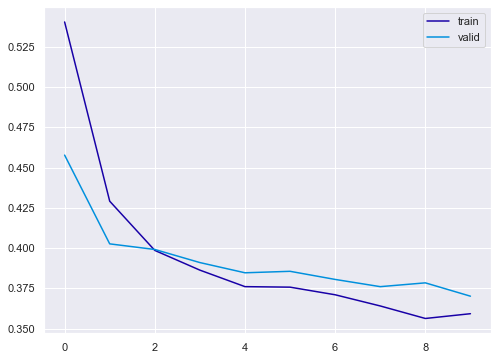

In [59]:
# Capture the learning history per epoch
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plot the accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.show()

#### Observations
* After 3 epochs the model starts to overfit and the reduction in loss is minimal. 

### Evaluate the Model

In [60]:
# Evaluate on test data using Keras .evaluate() function

score = model1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 921us/step - loss: 0.3716 - accuracy: 0.8490


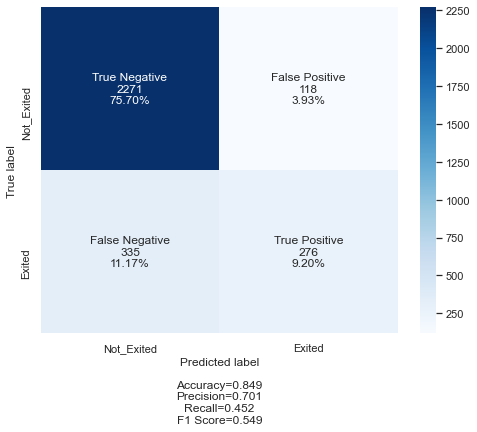

In [61]:
# Create a confusion matrix for this model 

y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


# Define a variable for the confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Add labels to the plot
labels = ['True Negative','False Positive','False Negative','True Positive']

# Define the categories and make the matrix
categories = ['Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations
* Model achieved an 85.40% accuracy. 
* Since the data is imbalanced, this is not great. If the model predicted every customer would stay, it would achieve 80% accuracy. 
* Our target metric is Recall and this model only achieved 44.8%, which is not good. 

## Model 2

In [62]:
# Initialize model 2
model2 = Sequential()

In [63]:
# Create an Early Stopping callback to help with regularization
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                             verbose=0, mode='min', restore_best_weights= True)

### Add Layers and Activations

In [64]:
# Add the input layer and the first hidden layer (units)
# Double the number of nodes in the first layer from 16 to 32
# USe he_normal as the kernel initializer for a different approach to the weights
model2.add(Dense(32, input_shape = (13, ), activation='relu', kernel_initializer='he_normal'))   # input of 13 columns 

# Add a second hidden layer
# Double the nodes
# Add he_normal initializer
model2.add(Dense(units=48,activation='relu', kernel_initializer='he_normal'))

#Add a "Dropout" layer to prevent overfitting 
model2.add(Dropout(0.5))

# Add a third hidden layer
# Add he_normal initializer
model2.add(Dense(48,activation='relu', kernel_initializer='he_normal'))

#Add a second "Dropout" layer to prevent overfitting 
model2.add(Dropout(0.5))

# Add a fourth hidden layer
# Add he_normal initializer
model2.add(Dense(48,activation='relu', kernel_initializer='he_normal'))

# Adding the output layer (one node because it's a binary classification)
# The binary classification is 1 = customer leaves the bank or 0 = stays
# Using sigmoid because we want probability outcomes
model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))                       

### Compile the Model

In [65]:
# Compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### View the Model Summary

In [66]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 48)                1584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 48)                2352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

### Train the Model

In [67]:
# Fit the model 
# Set initial batch size to 32 (double previous)
# Set initial epochs to 40 iterations
# Use validation split of 20%
# Add Early Stopping callback
history2 = model2.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/10
175/175 [==============================] - 1s 2ms/step - loss: 0.6022 - accuracy: 0.7643 - val_loss: 0.4940 - val_accuracy: 0.8014
Epoch 2/10
175/175 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7918 - val_loss: 0.4637 - val_accuracy: 0.7993
Epoch 3/10
175/175 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8055 - val_loss: 0.4320 - val_accuracy: 0.8071
Epoch 4/10
175/175 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8143 - val_loss: 0.4161 - val_accuracy: 0.8143
Epoch 5/10
175/175 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8200 - val_loss: 0.4023 - val_accuracy: 0.8243
Epoch 6/10
175/175 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8280 - val_loss: 0.3993 - val_accuracy: 0.8250
Epoch 7/10
175/175 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8334 - val_loss: 0.3907 - val_accuracy: 0.8321
Epoch 

### Plot the Train and Test Loss

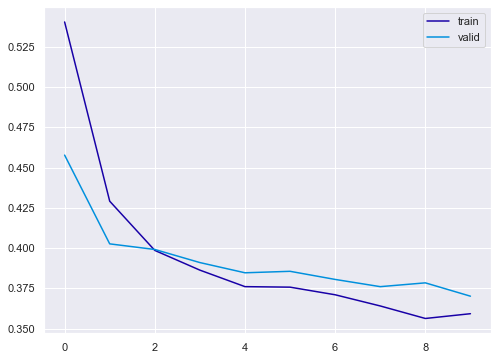

In [68]:
# Capture the learning history per epoch
hist2  = pd.DataFrame(history1.history)
hist2['epoch'] = history2.epoch

# Plot the accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.show()

#### Observations
* After 3 epochs the model starts to overfit and the reduction in loss is minimal. 

### Evaluate the Model

In [69]:
# Evaluate on test data using Keras .evaluate() function

score = model2.evaluate(X_test, y_test)

94/94 [==============================] - 0s 890us/step - loss: 0.3837 - accuracy: 0.8417


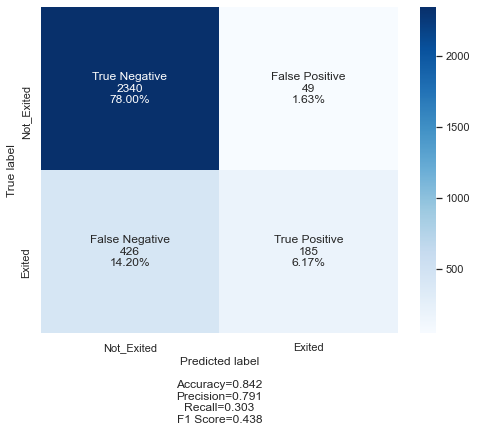

In [70]:
# Create a confusion matrix for this model 

y_pred2 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0


# Define a variable for the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Add labels to the plot
labels = ['True Negative','False Positive','False Negative','True Positive']

# Define the categories and make the matrix
categories = ['Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations
* Model 2 achieved an 85.40% accuracy -- equal to Model 1  
* Model 2 has a recall of 40.6% which is just a little lower than Model 1 

## Calculate the Optimal Threshold

I'm going to use Precision-Recall curve to calculate the optimal threshold since the target variable is imblanced. I am using and modifying a method I found on https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

### Model 1 - Calculate Optimal Threshold

Best Threshold=0.298751, F-Score=0.586


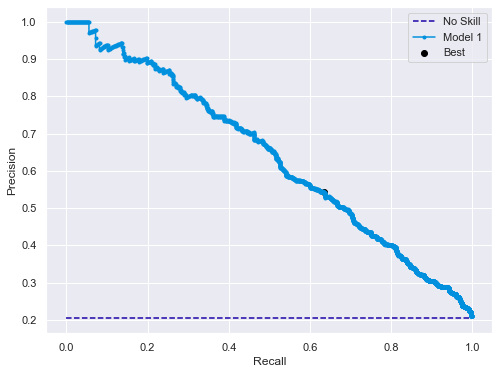

In [71]:
# predict probabilities
yhat = model1.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model 1')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Model 2 - Calculate Optimal Threshold

Best Threshold=0.310415, F-Score=0.589


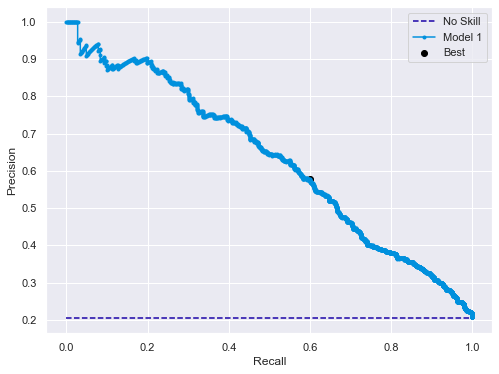

In [72]:
# predict probabilities
yhat = model2.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model 1')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

#### Observations
* The best threshold for both models is less than 0.5 due to the imbalance in the target variable. 
* Implementing the best threshold will improve the F1 score some, but the score will stil be low

## Model 3

For Model 3, I'll try using weighted loss to see if I can improve performance. I'll start with the same parameters as Model 1

In [73]:
# Calculate the class weight to overweight the underrepresented class (exited the bank)
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [74]:
# Initialize the model
model3 = Sequential()

In [75]:
# Add the input layer and the first hidden layer (units)
model3.add(Dense(units=16, input_dim = 13, activation='relu'))   # input of 13 columns 

# Add a second hidden layer
model3.add(Dense(units=24,activation='relu'))

#Add a "Dropout" layer to prevent overfitting 
model3.add(Dropout(0.5)) # fraction between 0 and 1. fraction of the input units to drop

# Add a third hidden layer
model3.add(Dense(24,activation='relu'))

# Add a fourth hidden layer
model3.add(Dense(24,activation='relu'))

# Adding the output layer (one node because it's a binary classification)
# The binary classification is 1 = customer leaves the bank or 0 = stays
# Using sigmoid because we want probability outcomes
model3.add(Dense(1,activation='sigmoid'))                       

In [76]:
# Create optimizer (using Adam here) with default learning rate
# Compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
# Fit the model and create a "history" variable
# Set initial batch size to 32 (which is the default)
# Set initial epochs to 10 iterations
# Use validation split of 20%
# Adding the class weights
history3 = model3.fit(X_train,y_train,batch_size=32,epochs=40,class_weight=class_weights,validation_split=0.2)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/40
175/175 [==============================] - 1s 2ms/step - loss: 0.6659 - accuracy: 0.5595 - val_loss: 0.6663 - val_accuracy: 0.5657
Epoch 2/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.6834 - val_loss: 0.5159 - val_accuracy: 0.7400
Epoch 3/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7389 - val_loss: 0.4771 - val_accuracy: 0.7729
Epoch 4/40
175/175 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7702 - val_loss: 0.4781 - val_accuracy: 0.7557
Epoch 5/40
175/175 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7614 - val_loss: 0.4677 - val_accuracy: 0.7657
Epoch 6/40
175/175 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7643 - val_loss: 0.4471 - val_accuracy: 0.7721
Epoch 7/40

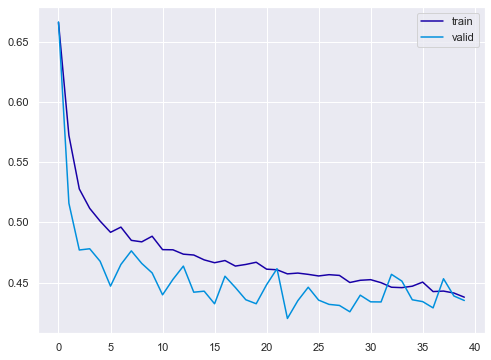

In [78]:
# Capture the learning history per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plot the accuracy at different epochs
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.show()

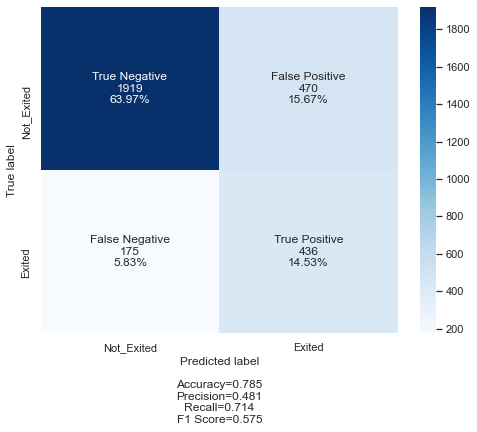

In [79]:
# Create a confusion matrix for this model 

y_pred3 = model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0


# Define a variable for the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Add labels to the plot
labels = ['True Negative','False Positive','False Negative','True Positive']

# Define the categories and make the matrix
categories = ['Not_Exited','Exited']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations
* Model 3 achieved an 79.8% accuracy -- lowest of the 3
* Model 3 has a recall of 69.1% which is the highest of the 3
* Since Recall is the chosen metric, Model 3 might be the best model... need to check optimal threshold. 

Best Threshold=0.581256, F-Score=0.583


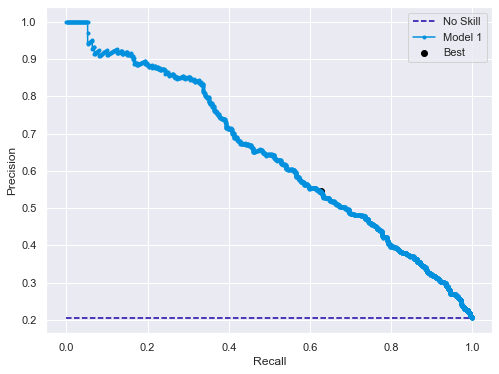

In [80]:
# predict probabilities
yhat = model3.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model 1')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

#### Observations
* Optimizing for threshold brings Model 3's F1 score about equal with the threshold optimized Model 1 F1 Score

<a href = #TOC>Back to Top</a>

# <a id = "performance"></a>5. Model Performance Evaluation

#### Observations
* The 3 models were all relatively close in performance
* None of the models was very strong in terms of Recall or F1 score
* The highest F1 score was Model 1 after threshold optimization (59.3%)
* The highest Recall score was Model 3 before threshold optimization (69.1%)
* If Recall is the chosen metric and F1 isn't important, then Model 3 with a 0.5 threshold (non-optimized) would be the best model. 

<a href = #TOC>Back to Top</a>

# <a id = "conclusion"></a>6. Conculsion and Key Takeaways

* Threshold tuning definitely helps overall performance (balance between precision and recall)
* I would recommend additional resampling (upsampling, downsampling) to see if performance can be improved given the imbalance in the data
* Hyperparameter tuning would also likely help. At this point in the course, I wasn't sure which hyperparameters to tune or how best to go about validating them in an efficient manner for a neural network.
* Adding a learning rate caused issues with loss reduction in validation (jumped around a lot) and required more epochs. 
* It could be that the features included in the data are not adequate for building a good model. The business may need to include other data points to create a model that can accurately predict customers who will leave. Nothing in the EDA jumped out as overly significant, so I was concerned about that from the start. 

Based on the performance and goal of the project, I would select Model 1. 

<a href = #TOC>Back to Top</a>